In [1]:
from matplotlib import pyplot as plt
import numpy as np
from optimize import optimize
from itertools import product


In [2]:
def f(p):
    return (p[0] - 57) ** 2 + (p[1] - 179) ** 2

In [3]:

def plot_optimizer_track(f, track, image_shape=(500, 500), log_scale=True):
    track_x = np.array([x for x, y in track])
    track_y = np.array([y for x, y in track])
    x_max, x_min = track_x.max(), track_x.min()
    y_max, y_min = track_y.max(), track_y.min()
    x_span = (x_max - x_min)
    y_span = (y_max - y_min)
    x_margin = 0.2 * x_span
    y_margin = 0.2 * y_span
    image_widht, image_height = image_shape
    pixel_width = (x_span + 2 * x_margin) / image_widht
    pixel_height = (y_span + 2 * y_margin) / image_height

    def pixel_pos_to_point_coords(pixel_pos):
        i, j = pixel_pos
        x = j * pixel_width + x_min - x_margin
        y = i * pixel_height + y_min - y_margin
        return x, y

    image = np.zeros(shape=image_shape)
    for i, j in product(range(image_height), range(image_widht)):
        image[i, j] = f(pixel_pos_to_point_coords((i, j)))
    if log_scale:
        image = np.log(image)
    plt.rc("figure", figsize=(10, 6))
    plt.imshow(
        image, origin="lower",
        cmap="Greys", alpha=0.9,
        extent=(
            x_min - x_margin, x_max + x_margin,
            y_min - y_margin, y_max + y_margin
        ),
#         aspect="equal",
        aspect="auto"
    )
    plt.scatter(*zip(*track), s=2, color="red")

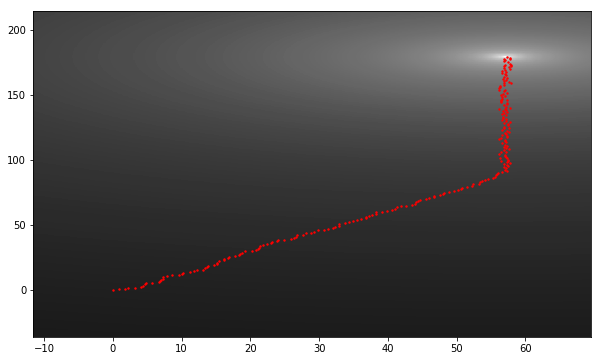

In [4]:
track = optimize(f)
plot_optimizer_track(f, track)